Generar Datos Sintéticos con make_blobs

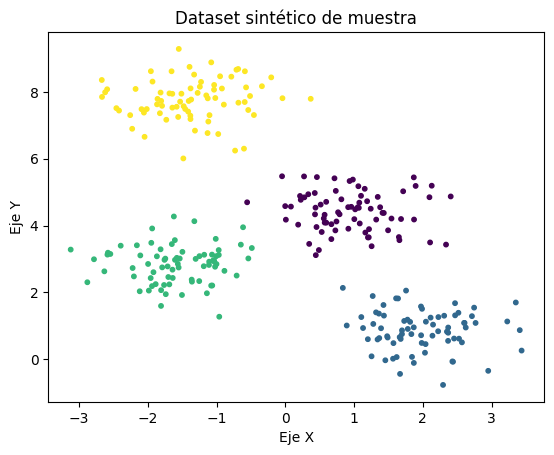

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


# Generamos el dataset con 4 centros
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualizamos los datos generados, con los clusters diferenciados por colores
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=10)
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Dataset sintético de muestra")
plt.show()



Implementación de K-Means desde Cero

In [2]:
class KMeansScratch:
    def __init__(self, k=4, max_iter=100, init='random'):
        self.k = k
        self.max_iter = max_iter
        self.init = init  # 'random' o 'points'
        self.centroids = None
        self.labels = None

    def initialize_centroids(self, X):
        if self.init == 'random':
            # Inicializar aleatoriamente dentro del rango de los datos
            min_vals = X.min(axis=0)
            max_vals = X.max(axis=0)
            self.centroids = np.random.uniform(min_vals, max_vals, (self.k, X.shape[1]))
        elif self.init == 'points':
            # Escoger aleatoriamente k puntos del dataset como centroides iniciales
            indices = np.random.choice(X.shape[0], self.k, replace=False)
            self.centroids = X[indices]

    def compute_distances(self, X):
        distances = np.zeros((X.shape[0], self.k))
        for i, centroid in enumerate(self.centroids):
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)  # Distancia euclídea
        return distances

    def assign_clusters(self, distances):
        return np.argmin(distances, axis=1)

    def update_centroids(self, X, labels):
        new_centroids = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            points_in_cluster = X[labels == i]
            if len(points_in_cluster) > 0:
                new_centroids[i] = np.mean(points_in_cluster, axis=0)
        return new_centroids

    def fit(self, X):
        self.initialize_centroids(X)
        for _ in range(self.max_iter):
            distances = self.compute_distances(X)
            new_labels = self.assign_clusters(distances)
            new_centroids = self.update_centroids(X, new_labels)
            if np.all(self.centroids == new_centroids):
                break  # Convergencia
            self.centroids = new_centroids
        self.labels = new_labels

    def predict(self, X):
        distances = self.compute_distances(X)
        return self.assign_clusters(distances)


Entrenar el Modelo y Visualizar Resultados

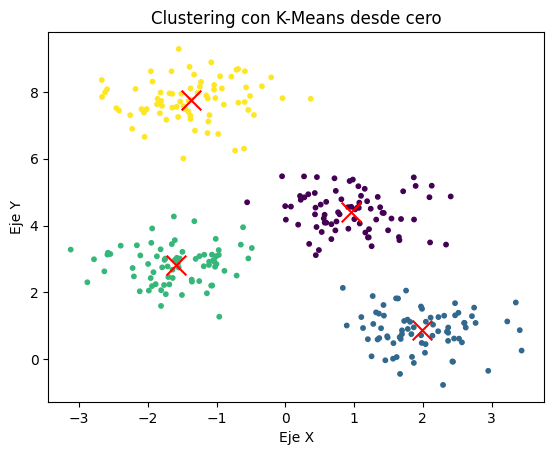

In [8]:
# Creamos el modelo con k=4 y lo entrenamos
kmeans = KMeansScratch(k=4, max_iter=100, init='points')
kmeans.fit(X)

# Predecimos los clusters
labels = kmeans.predict(X)

# Graficamos los clusters con colores diferentes
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=10, cmap='viridis')

# Dibujamos los centroides
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', s=200, marker='x')

plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Clustering con K-Means desde cero")
plt.show()


Determinar el Mejor k sin sklearn (Método del Codo)

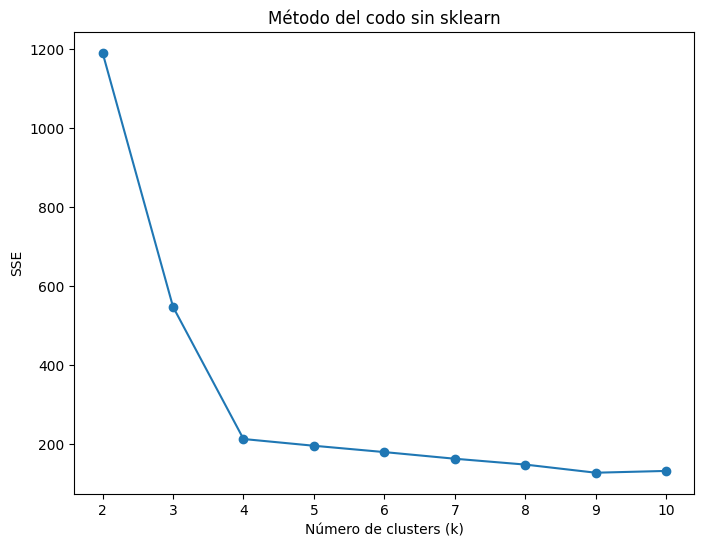

In [4]:
def compute_sse(X, labels, centroids):
    sse = 0
    for i in range(len(X)):
        centroid = centroids[labels[i]]
        sse += np.linalg.norm(X[i] - centroid) ** 2
    return sse

sse_values = []

for k in range(2, 11):
    kmeans = KMeansScratch(k=k, max_iter=100, init='points')
    kmeans.fit(X)
    sse = compute_sse(X, kmeans.labels, kmeans.centroids)
    sse_values.append(sse)

# Graficamos el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sse_values, marker='o')
plt.title("Método del codo sin sklearn")
plt.xlabel("Número de clusters (k)")
plt.ylabel("SSE")
plt.show()
